In [1]:
import pandas as pd

In [210]:
train = pd.read_csv('./train.csv', index_col=0)
test = pd.read_csv('./test.csv', index_col=0)

train.shape, test.shape

((1460, 80), (1459, 79))

In [80]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
# Data cleaning

In [211]:
# Number of missing values in each column of training data
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [212]:
missing_val_count_by_column = (test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [ ]:
# I decided to delete columns which have more than 50% nulls

In [213]:
train.drop(missing_val_count_by_column[missing_val_count_by_column >= 0.5*train.shape[0]].index, 
           inplace = True, axis=1)
test.drop(missing_val_count_by_column[missing_val_count_by_column >= 0.5*train.shape[0]].index, 
           inplace = True, axis=1)

train.shape

(1460, 75)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   object  
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   object  
 16  OverallCond    1460 non-null   object  
 17  YearBuilt      1460 non-null   in

In [214]:
for to_str in ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']:
    train[to_str] = train[to_str].apply(str) 
    test[to_str] = test[to_str].apply(str) 
    
train['CentralAir'] = train['CentralAir'].astype('category')
test['CentralAir'] = test['CentralAir'].astype('category')

In [23]:
# Depending on variable type, I'm imputting most frequent value for categorical features and median for numerical features

In [24]:
# median or mean?

In [215]:
target_f = ['SalePrice']
cat_f = train.iloc[:, :-1].select_dtypes(exclude='number').columns
num_f = train.iloc[:, :-1].select_dtypes(include='number').columns
len(cat_f) +len(num_f) + 1

75

In [216]:
train.loc[:5, num_f]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,2008
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,2007
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,2008
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,2006
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,2008


In [105]:
import matplotlib.pyplot as plt
import numpy as np

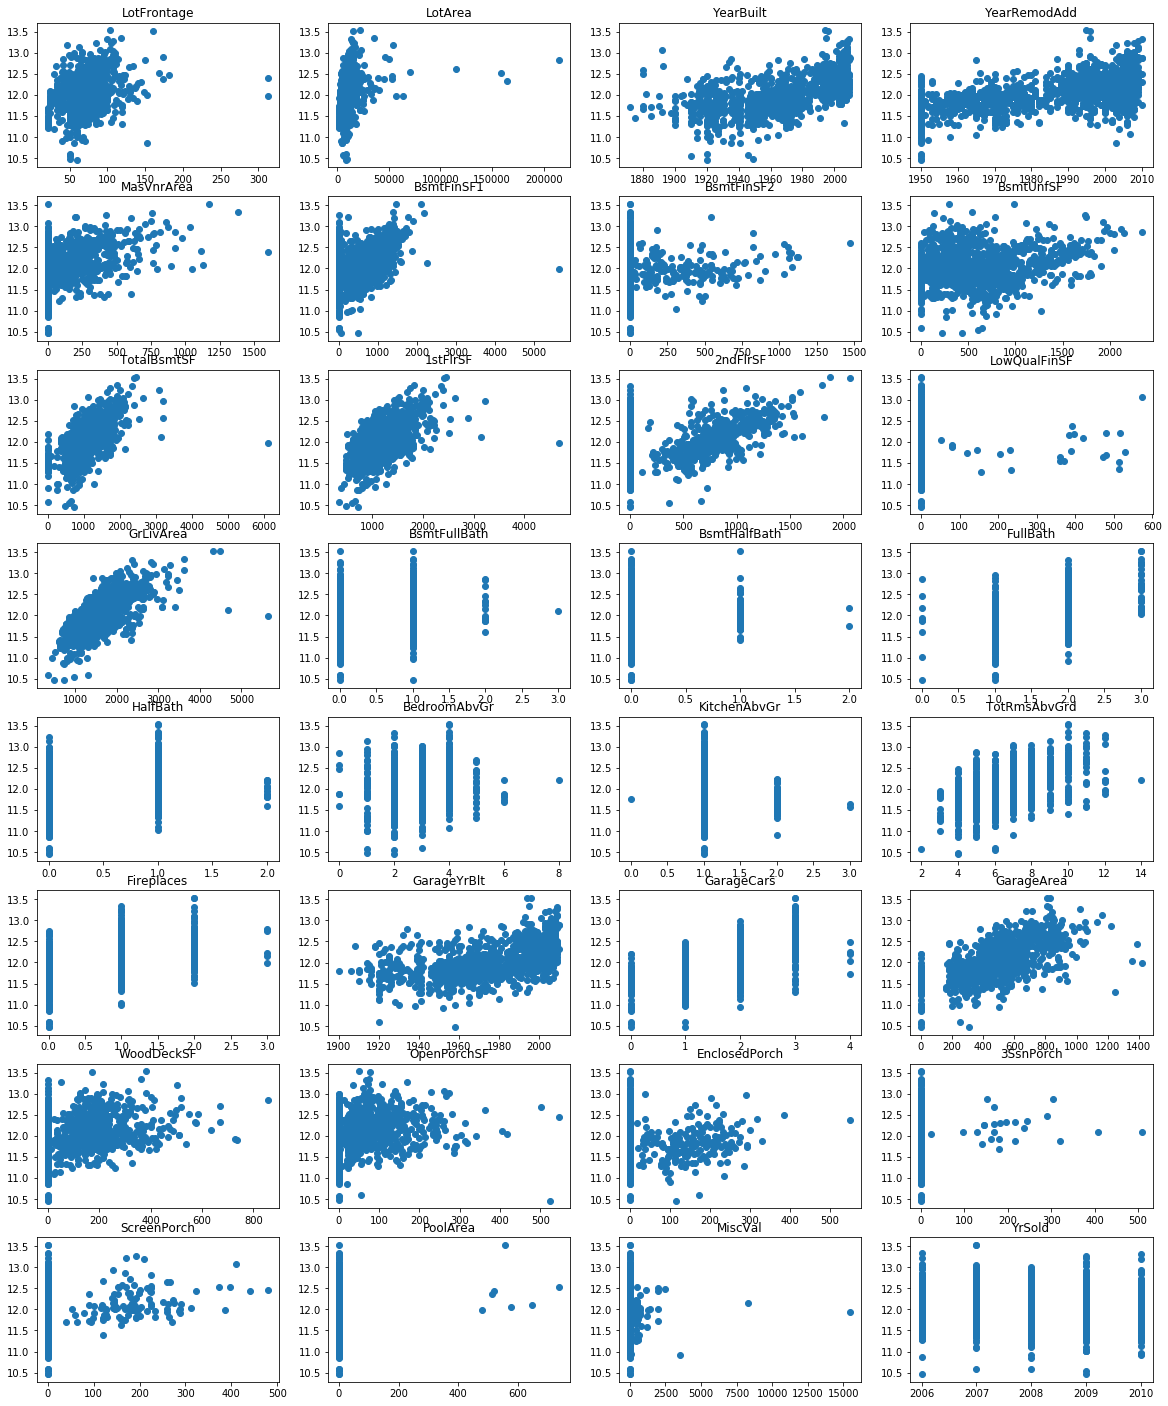

In [117]:
i = 0
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 25))
for row in ax:
    for col in row:
        col.scatter(x = train[num_f[i]], y = np.log(train['SalePrice']))
        col.title.set_text(num_f[i])
        i += 1    

In [153]:
# rows to drop
train.GrLivArea[train.GrLivArea > 4000].value_counts()

4316    1
4676    1
4476    1
5642    1
Name: GrLivArea, dtype: int64

In [217]:
# rows to drop

top_value_shares = pd.DataFrame([int(train[i].value_counts().head(1))/1460 for i in num_f ], index = num_f, columns=['share'])
top_value_shares.sort_values(by='share', inplace = True)
# [train[i].value_counts().head(1)/1460 ]
top_value_shares

,share
GrLivArea,0.015068
LotArea,0.017123
1stFlrSF,0.017123
TotalBsmtSF,0.025342
GarageYrBlt,0.044521
YearBuilt,0.045890
GarageArea,0.055479
BsmtUnfSF,0.080822
LotFrontage,0.097945
YearRemodAdd,0.121918


In [218]:
train.shape

(1460, 75)

In [219]:
num_f2 = list(top_value_shares.index[top_value_shares.share < 0.1])
num_f2

['GrLivArea',
 'LotArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'YearBuilt',
 'GarageArea',
 'BsmtUnfSF',
 'LotFrontage']

In [221]:
train2 = train[(train.LotFrontage != 313) & (train.LotArea <= 100000) & (train['1stFlrSF'] <= 3000)
     & (train.GrLivArea <= 4000)]
train2.shape

(1450, 75)

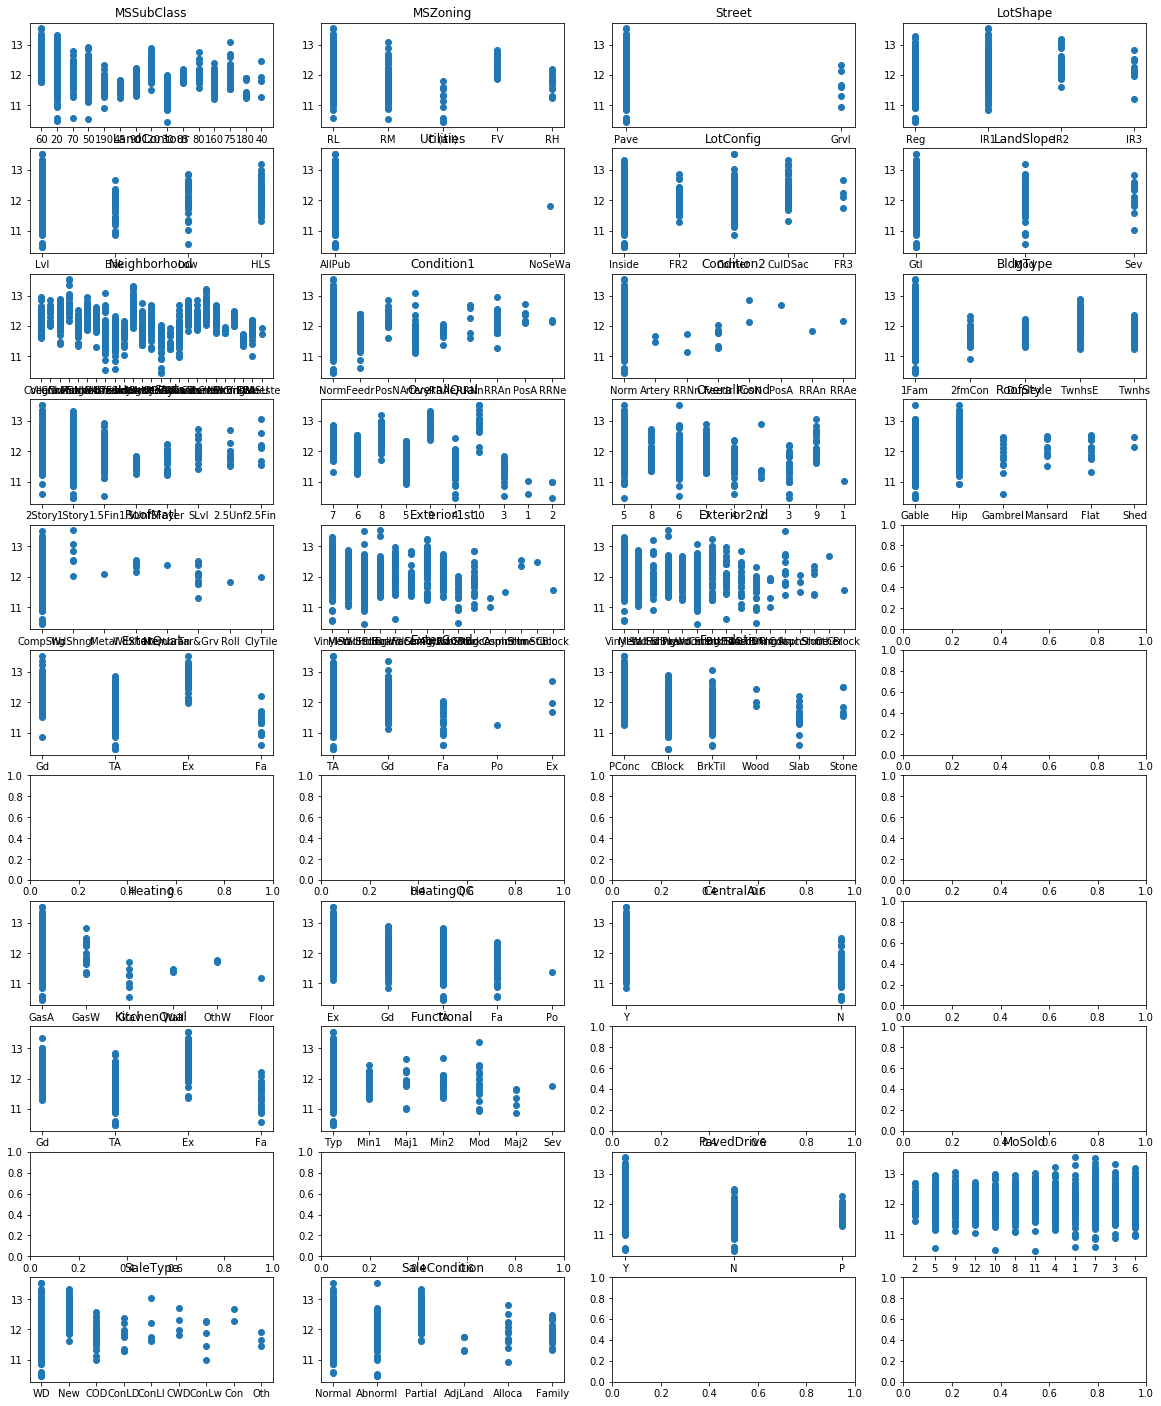

In [228]:
i = 0
fig, ax = plt.subplots(nrows=11, ncols=4, figsize=(20, 25))
for row in ax:
    for col in row:
        try:
            col.scatter(x = train[cat_f[i]], y = np.log(train['SalePrice']))
            col.title.set_text(cat_f[i])
        except:
            pass
        i += 1     

In [222]:
# rows to drop

top_value_shares_cat = pd.DataFrame([int(train[i].value_counts().head(1))/1460 for i in cat_f ], index = cat_f, columns=['share'])
top_value_shares_cat.sort_values(by='share', inplace = True)
top_value_shares_cat

,share
Neighborhood,0.154110
MoSold,0.173288
OverallQual,0.271918
BsmtFinType1,0.294521
Exterior2nd,0.345205
Exterior1st,0.352740
MSSubClass,0.367123
GarageFinish,0.414384
Foundation,0.443151
BsmtQual,0.444521


In [229]:
cat_f2 = list(top_value_shares_cat.index[top_value_shares_cat.share < 0.4])
cat_f2

['Neighborhood',
 'MoSold',
 'OverallQual',
 'BsmtFinType1',
 'Exterior2nd',
 'Exterior1st',
 'MSSubClass']

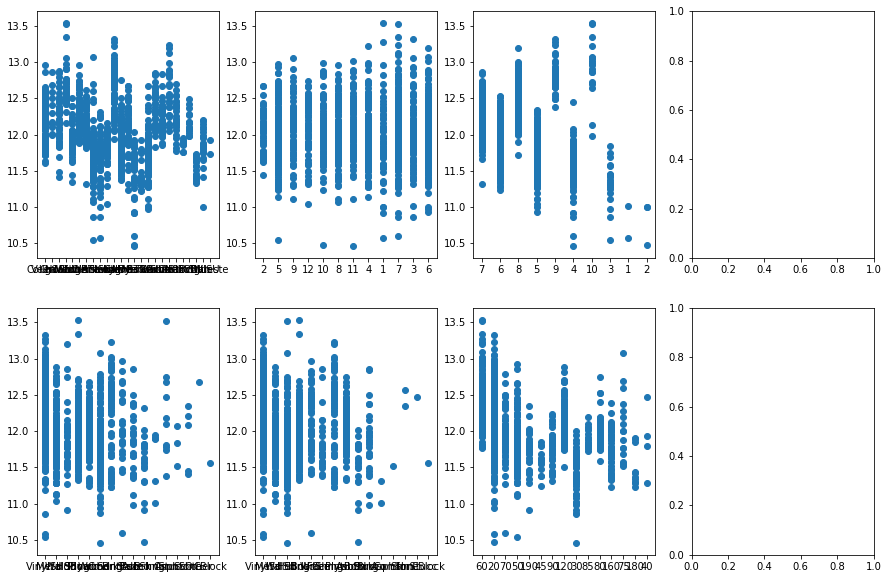

In [237]:
i = 0
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for row in ax:
    for col in row:
        try:
            col.scatter(x = train[cat_f2[i]], y = np.log(train['SalePrice']))
            col.xticks(range(len(cat_f2[i])), train[i].unique(),  size='large')
            col.title.set_text(cat_f2[i])
        except:
            pass
        i += 1     

In [244]:
from sklearn.impute import SimpleImputer

impute_mean = SimpleImputer(strategy='mean')
train_num_imputed = pd.DataFrame(impute_mean.fit_transform(train2.loc[:, num_f2]), columns=num_f2, index=train2.index)
test_num_imputed = pd.DataFrame(impute_mean.transform(test.loc[:, num_f2]), columns=num_f2, index=test.index)

impute_freq = SimpleImputer(strategy='most_frequent')
train_cat_imputed = pd.DataFrame(impute_freq.fit_transform(train2.loc[:, cat_f2]), columns=cat_f2, index=train2.index)
test_cat_imputed = pd.DataFrame(impute_freq.transform(test.loc[:, cat_f2]), columns=cat_f2, index=test.index)


In [242]:
train_num_imputed.shape

(1450, 9)

In [ ]:
# convert categorical to binary with LabelEncoder & OneHotEncoder

In [ ]:
# ile na ile podzielić

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [245]:
train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [249]:
train_cat_le = pd.DataFrame()
test_cat_le = pd.DataFrame()


test_cat_imputed.MSSubClass.replace('150', '160', inplace=True)

le = LabelEncoder()
for f in cat_f2:
    train_cat_le[f] = le.fit_transform(train_cat_imputed[f])
    test_cat_le[f] = le.transform(test_cat_imputed[f])
    
train_cat_le.index = train2.index
test_cat_le.index = test.index

In [250]:
train_imputed = pd.concat([train_num_imputed, train_cat_le], axis = 1)
test_imputed = pd.concat([test_num_imputed, test_cat_le], axis = 1)

train_imputed.shape

(1450, 16)

In [272]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit_transform(train_cat_imputed)
train_cat_ohe = pd.DataFrame(ohe.fit_transform(train_cat_imputed), 
                             index=train2.index, columns=ohe.get_feature_names())
test_cat_ohe = pd.DataFrame(ohe.transform(test_cat_imputed),
                                 index=test.index, columns=ohe.get_feature_names())


In [273]:
train_imputed2 = pd.concat([train_num_imputed, train_cat_ohe], axis = 1)
test_imputed2 = pd.concat([test_num_imputed, test_cat_ohe], axis = 1)

train_imputed2.shape

(1450, 108)

In [269]:
# label encoder
models = [('rf', RandomForestRegressor()),
          ('svr', SVR()),
          ('br', BayesianRidge()),
          ('lr', LinearRegression())]
for name, model in models:
    score = cross_val_score(model, train_imputed, train.SalePrice.loc[train2.index], 
                            scoring='neg_mean_absolute_error')
    print(name, score.mean())

rf -18065.59770574713
svr -54494.6500382795
br -24569.704913104906
lr -23888.666934936788


In [274]:
# label encoder
models = [('rf', RandomForestRegressor()),
          ('svr', SVR()),
          ('br', BayesianRidge()),
          ('lr', LinearRegression())]
for name, model in models:
    score = cross_val_score(model, train_imputed2, train.SalePrice.loc[train2.index], 
                            scoring='neg_mean_absolute_error')
    print(name, score.mean())

rf -18392.62127126437
svr -54496.23750405281
br -24742.053849981094
lr -17750.765011216692


In [343]:
cols = train_imputed2.columns.drop('x2_10')

In [344]:
# ohe + dropped LotArea
models = [('rf', RandomForestRegressor()),
          ('svr', SVR()),
          ('br', BayesianRidge()),
          ('lr', LinearRegression())]
for name, model in models:
    score = cross_val_score(model, train_imputed2.loc[:, cols], train.SalePrice.loc[train2.index], 
                            scoring='neg_mean_absolute_error')
    print(name, score.mean())

rf -18435.624737931037
svr -54496.235162869314
br -24743.000711023134
lr -17893.477508285963


In [331]:
lr = LinearRegression()
lr.fit(train_imputed2, train.SalePrice.loc[train2.index])
preds = lr.predict(test_imputed2)
preds

array([126561.88887209, 167343.81623037, 194975.75088776, ...,
       167138.89332195, 126204.0026474 , 204659.9898007 ])

In [333]:
pd.DataFrame(lr.coef_, train_imputed2.columns, ['coef']).sort_values('coef') #.to_csv('./coef.csv')

,coef
x2_1,-51674.605764
x2_2,-43509.887824
x2_3,-38043.393081
x5_BrkComm,-37607.099601
x5_ImStucc,-29702.165967
...,...
x5_Stucco,24073.174429
x0_Crawfor,28674.772076
x0_StoneBr,34313.360900
x2_9,76829.471160


In [283]:
pd.DataFrame(preds, index=test.index, columns= ['SalePrice']).to_csv('~/resutls.csv')

In [318]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_imputed22 = scaler.fit_transform(train_imputed2)
test_imputed22 = scaler.transform(test_imputed2)

In [321]:
lr = LinearRegression()
lr.fit(train_imputed22, train.SalePrice.loc[train2.index])
preds = lr.predict(test_imputed2)
preds

array([4.46336420e+16, 4.38820229e+16, 4.01315347e+16, ...,
       3.34213965e+16, 4.22130207e+16, 2.83230749e+16])

In [323]:
pd.DataFrame(scaler.inverse_transform(preds), index=test.index, columns= ['SalePrice']).to_csv('~/resutls.csv')

ValueError: operands could not be broadcast together with shapes (1459,) (108,) (1459,) 

In [324]:
scaler.inverse_transform(preds)

ValueError: operands could not be broadcast together with shapes (1459,) (108,) (1459,) 

In [ ]:
# choosing variables for analysis

In [16]:
# choosing model


In [267]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor


In [34]:
cross_val_score(LinearRegression(), train_imputed.loc[:, L2_selected_columns], train.SalePrice, 
#                 scoring='neg_root_mean_squared_error',
               scoring='neg_mean_absolute_error')


array([-24109.67152618, -24197.12329468, -23620.27665774, -23246.29815432,
       -28359.69003644])

In [31]:
cross_val_score(LinearRegression(), train_imputed.loc[:, L1_selected_columns], train.SalePrice,
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')


array([-21638.59718796, -21746.85908166, -21278.25744067, -20691.14789601,
       -24127.92939446])

In [37]:
cross_val_score(RandomForestRegressor(), train_imputed.loc[:, L1_selected_columns], train.SalePrice,
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')



array([-18256.15936073, -17473.65101598, -18206.34277397, -17064.26432648,
       -20257.83715753])

In [38]:
cross_val_score(RandomForestRegressor(), train_imputed.loc[:, L2_selected_columns], train.SalePrice,
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')




array([-19671.02015297, -20526.20714612, -19164.04321918, -18612.55547293,
       -22186.65859589])

In [41]:
cross_val_score(SVR(), train_imputed.loc[:, L2_selected_columns], train.SalePrice,
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')




array([-55181.62751002, -59569.9109116 , -57953.5086797 , -49696.29718432,
       -55321.17130862])

In [254]:
cross_val_score(SVR(), train_imputed, train.SalePrice.loc[train2.index],
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')





array([-55128.56732447, -58220.16035557, -55808.63321708, -49616.22577423,
       -53699.66352004])

In [71]:
#L2 liblinear  1722
logistic = LogisticRegression(C=1, penalty="l2", random_state=13, solver='lbfgs').fit(train_imputed2, train.SalePrice)
model = SelectFromModel(logistic, prefit=True)
X_new = model.transform(train_imputed2)
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=train.index,
                                 columns=train_imputed2.columns)

# Dropped columns have values of all 0s, keep other columns 
L22_selected_columns = selected_features.columns[selected_features.var() != 0]
len(L22_selected_columns)

/Users/katarzynawrona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


20

In [69]:
L22_selected_columns = ['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'YrSold']

Index(['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'YrSold'],
      dtype='object')

In [72]:
logistic = LogisticRegression(C=1, penalty="l1", random_state=13, solver='saga').fit(train_imputed2, train.SalePrice)
model = SelectFromModel(logistic, prefit=True)
X_new = model.transform(train_imputed2)
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=train.index,
                                 columns=train_imputed2.columns)

# Dropped columns have values of all 0s, keep other columns 
L11_selected_columns = (selected_features.columns[selected_features.var() != 0])
len(L11_selected_columns)

/Users/katarzynawrona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


28

In [74]:
L11_selected_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [75]:
cross_val_score(LinearRegression(), train_imputed.loc[:, L22_selected_columns], train.SalePrice, 
#                 scoring='neg_root_mean_squared_error',
               scoring='neg_mean_absolute_error')



array([-23930.86269107, -24593.33759849, -23049.48241337, -22861.90102081,
       -28001.44973002])

In [252]:
cross_val_score(LinearRegression(), train_imputed, train.SalePrice.loc[train2.index], 
#                 scoring='neg_root_mean_squared_error',
               scoring='neg_mean_absolute_error')




array([-24050.86825781, -23641.6539956 , -22950.82773416, -23066.35088694,
       -25733.63380017])

In [76]:
cross_val_score(LinearRegression(), train_imputed.loc[:, L11_selected_columns], train.SalePrice,
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')



array([-21984.14266479, -21623.14136915, -21351.22765634, -20736.47357354,
       -24333.57509124])

In [ ]:
cross_val_score(LinearRegression(), train_imputed.loc[:, L11_selected_columns], train.SalePrice,
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')




In [77]:
cross_val_score(RandomForestRegressor(), train_imputed.loc[:, L22_selected_columns], train.SalePrice,
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')





array([-19304.08570776, -20340.78455479, -19478.15705479, -18004.15731279,
       -21722.84390411])

In [253]:
cross_val_score(RandomForestRegressor(), train_imputed, train.SalePrice.loc[train2.index],
#                scoring='neg_root_mean_squared_error',
                              scoring='neg_mean_absolute_error')






array([-18620.74271264, -17470.97608867, -17979.33206897, -17438.52677997,
       -18490.70037931])